# Sample of splitting data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data.csv')
df = pd.DataFrame(data)
# Assuming 'data' is your DataFrame and 'signal' is the target variable
X = data.drop(['signal', 'datetime', 'datetime.1', 'Unnamed: 0'], axis=1)  # Exclude 'datetime' for model training
y = data['signal'].map({'buy': 0, 'sell': 1, 'none': 2}).astype(int)  # Encoding signals
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Sample of plotting results

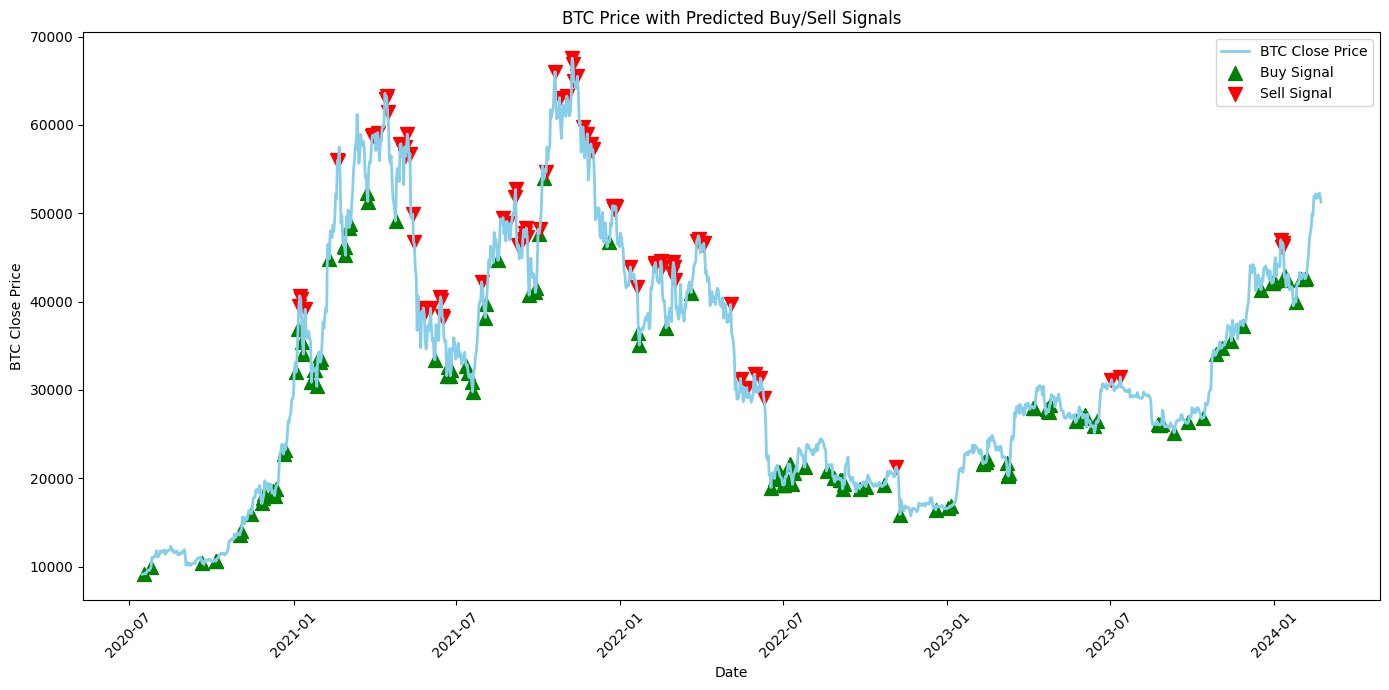

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime is in the correct format
df['datetime'] = pd.to_datetime(df['datetime'])

plt.figure(figsize=(14, 7))
plt.plot(df['datetime'], df['close'], label='BTC Close Price', color='skyblue', linewidth=2)

# Adjust the conditions to match the labels
# Highlight buy signals
buy_signals = df[df['predicted_signal'] == 0]  # Assuming 0 represents 'buy'
plt.scatter(buy_signals['datetime'], buy_signals['close'], label='Buy Signal', marker='^', color='green', alpha=1, s=100)

# Highlight sell signals
sell_signals = df[df['predicted_signal'] == 1]  # Assuming 1 represents 'sell'
plt.scatter(sell_signals['datetime'], sell_signals['close'], label='Sell Signal', marker='v', color='red', alpha=1, s=100)

plt.title('BTC Price with Predicted Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
